# We will use kNN to predict the type of Breast Cancer in the Breast Cancer Wisconsin(Diagnostic)Data

In [1]:
#Import Libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load and review Data

In [2]:
bcData = pd.read_csv("wisc_bc_data.csv")

In [3]:
bcData.shape

(569, 32)

In [4]:
bcData.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [5]:
bcData['diagnosis'] = bcData.diagnosis.astype('category')


In [12]:
bcData.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
bcData.groupby(["diagnosis"]).count()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [8]:
bcData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


drop the first column from the data frame. This is Id column which is not used in modeling

In [9]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bcData = bcData.drop(labels = "id", axis = 1)


In [10]:
bcData.shape

(569, 31)

In [11]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = bcData.drop(labels= "diagnosis" , axis = 1)
y = bcData["diagnosis"]
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [13]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.162905e-16,-7.373520e-16,-1.303390e-16,-2.239958e-16,1.598019e-16,1.730699e-16,3.707247e-17,-5.775501e-17,1.449729e-16,-1.523630e-15,...,-8.507157e-17,6.634022e-18,-3.570665e-16,-1.888745e-16,-2.265323e-16,-4.487720e-18,9.112024e-17,2.302396e-16,2.718973e-16,1.882891e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [14]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1)

# Build kNN Model

In [15]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [16]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

# Evaluate Performance of kNN Model

In [17]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9473684210526315

Confusion Matrix


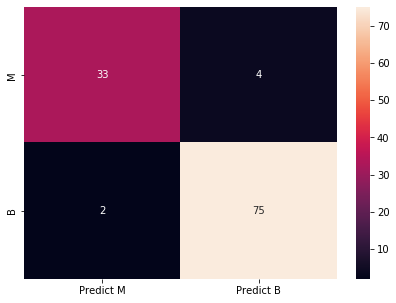

In [18]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["M", "B"])

df_cm = pd.DataFrame(cm, index = [i for i in ["M","B"]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Choosing the K-Value

#### Choosing the right k is not easy and is subjective. Usually choose as an odd number is choosen.

#### A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.

#### If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.

In [19]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

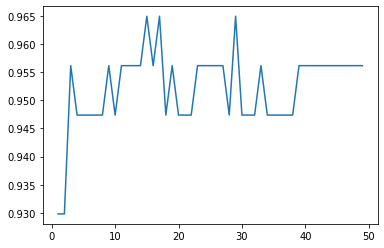

In [20]:
plt.plot(range(1,50),scores)